# Stroke Prediction

Data load
data read
data visualise
1. see all the univariant distribution
2. see bivariant distributions
3. See boxplots
4. violin plots
5. heatmap
plot correlaiton with target columns

data preprocessing

handle nan values
one hot encoding for categorical values
outlier removing
log transformation

Feature enginerring
Standard scaler

model training ==

1. Cross validation,
2. KNN
3. naive bayes
4. Randomforest
5. DecisionTree
6. Logistic Regression

see confusion matrix


In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# for model trainining
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier  # Decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [261]:
# Data loading and reading
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [262]:
df.shape

(5110, 12)

In [263]:
df1 = df.drop(["id"], axis="columns")
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [264]:
# Exploratory Data analysis

Text(0.5, 1.0, 'Stroke Distribution')

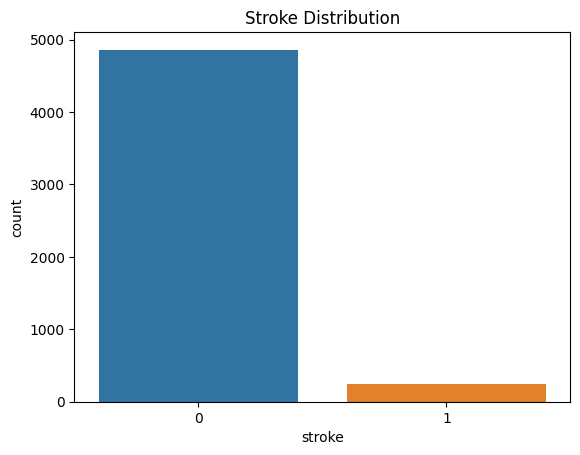

In [265]:
# Distribution of Target column

sns.countplot(x=df1["stroke"])
plt.title("Stroke Distribution")

More Data in NO stroke (0), very less data in Stroke(1) this data will help us in model selection 

In [179]:
# Univariant analysis of categorical variables

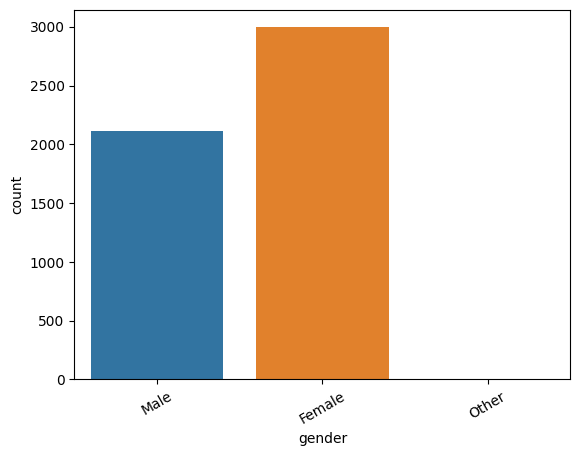

In [180]:
sns.countplot(x=df1["gender"], data=df1)
plt.xticks(rotation=30)
plt.show()

In [181]:
df1.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


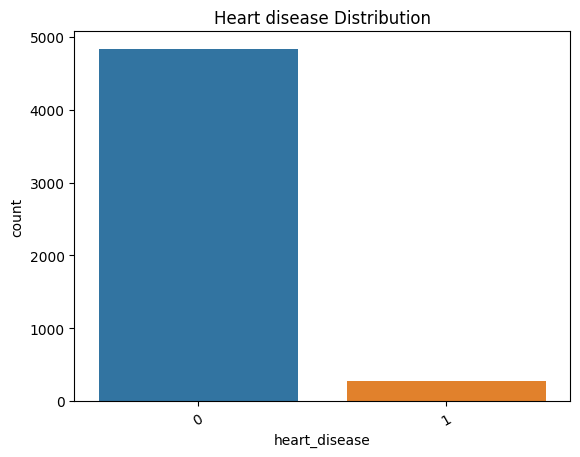

In [182]:
sns.countplot(x=df1["heart_disease"], data=df1)
plt.xticks(rotation=30)
plt.title("Heart disease Distribution")
plt.show()

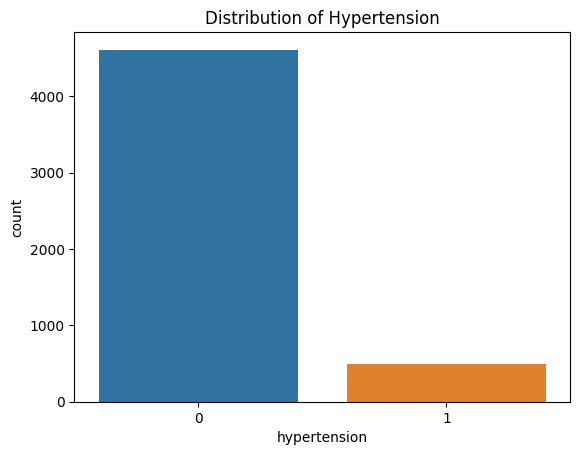

In [183]:
sns.countplot(x=df1["hypertension"], data=df1)
plt.title("Distribution of Hypertension")
plt.show()

Most patients have Hypertension

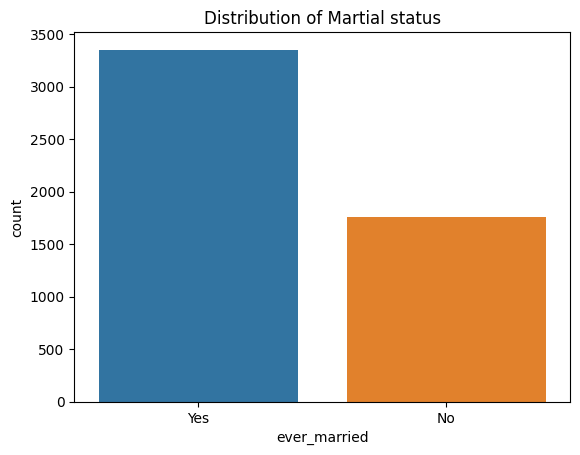

In [184]:
sns.countplot(x=df1["ever_married"], data=df1)
plt.title("Distribution of Martial status")
plt.show()

So many people have marriend once

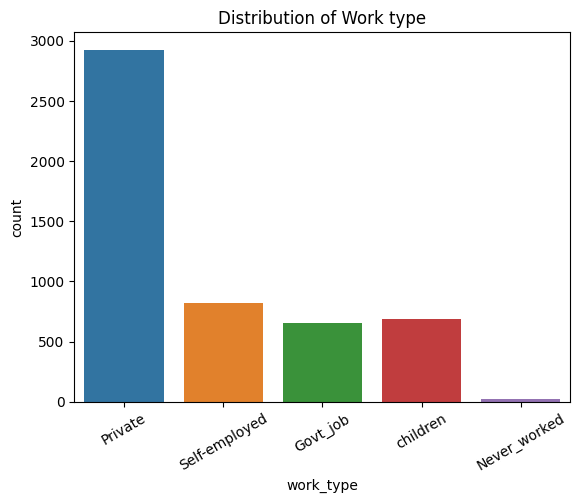

In [185]:
sns.countplot(x=df1["work_type"], data=df1)
plt.title("Distribution of Work type")
plt.xticks(rotation=30)
plt.show()

Most people works in private sector

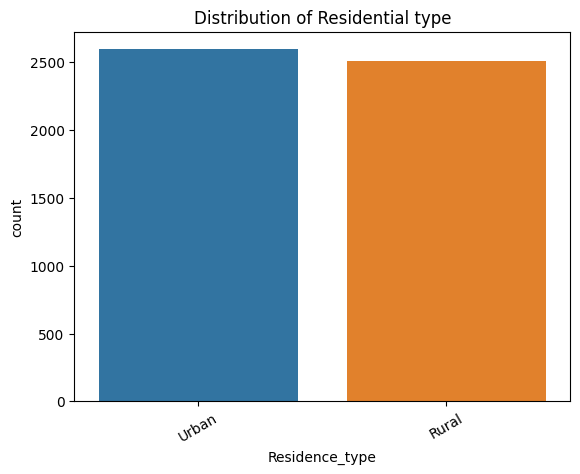

In [186]:
sns.countplot(x=df1["Residence_type"], data=df1)
plt.title("Distribution of Residential type")
plt.xticks(rotation=30)
plt.show()

Number of Rural people and Urban people is almost equal

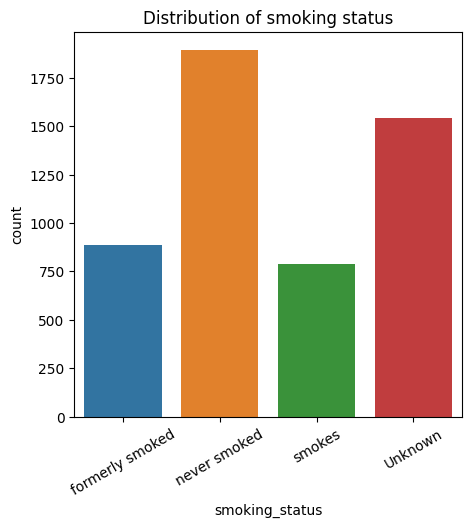

In [187]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df1["smoking_status"], data=df1)
plt.title("Distribution of smoking status")
plt.xticks(rotation=30)
plt.show()

Most people never smoked

In [188]:
df1.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


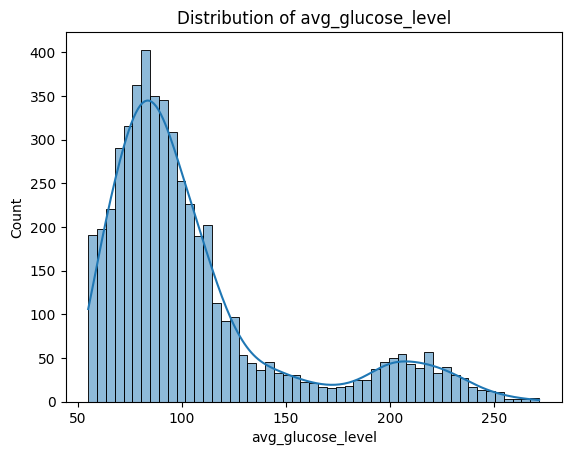

In [189]:
sns.histplot(data=df, x='avg_glucose_level', kde=True)
plt.title("Distribution of avg_glucose_level")
plt.show()

Most patients have average glucose level in the range 50 - 125

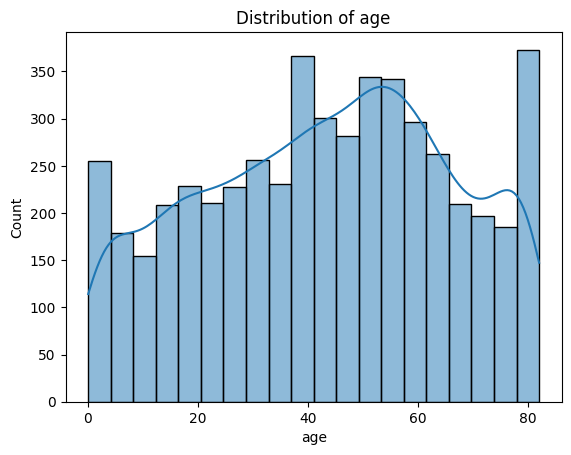

In [190]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Distribution of age")
plt.show()

Majority of the patients varies from 40-80 years old, All ages patients are available

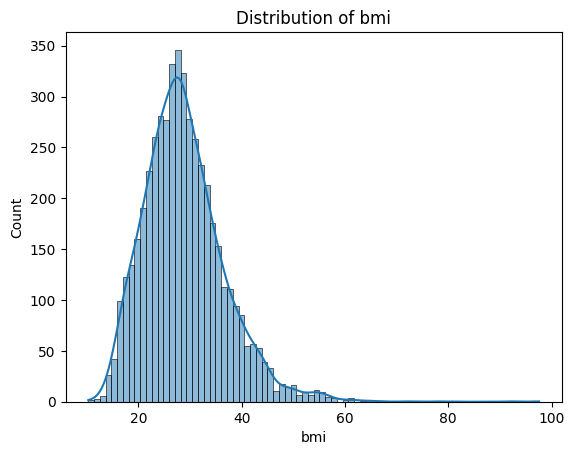

In [191]:
sns.histplot(data=df, x='bmi', kde=True)
plt.title("Distribution of bmi")
plt.show()

Majority people have bmi range 20-40

In [192]:
# BOXPLOT visualisation 

Text(0.5, 1.0, 'Outlier Visualisation of avg_glucose_level')

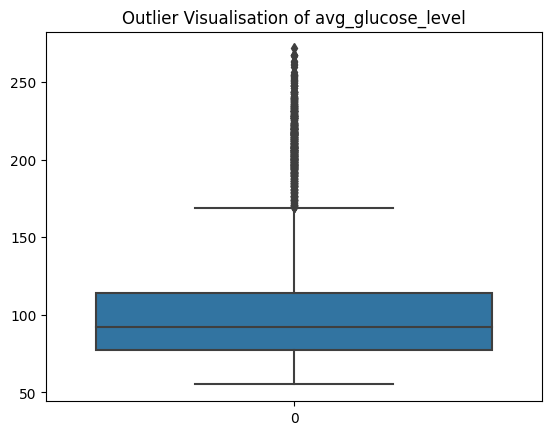

In [193]:

sns.boxplot(df1['avg_glucose_level'])
plt.title("Outlier Visualisation of avg_glucose_level")



Some outliers at extremly high glucose level

<Axes: title={'center': 'Outlier Visualisation of age'}>

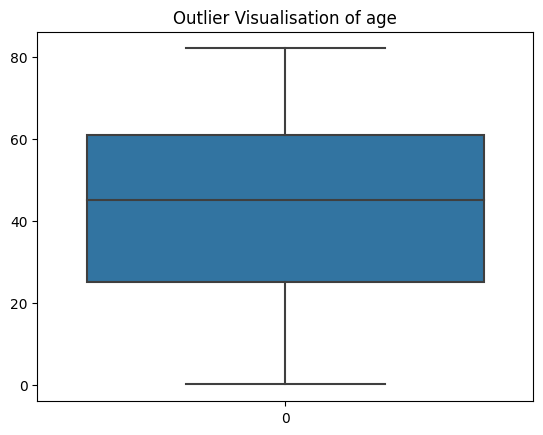

In [194]:
plt.title("Outlier Visualisation of age")

sns.boxplot(df1['age'])

Text(0.5, 1.0, 'Outlier Visualisation of bmi')

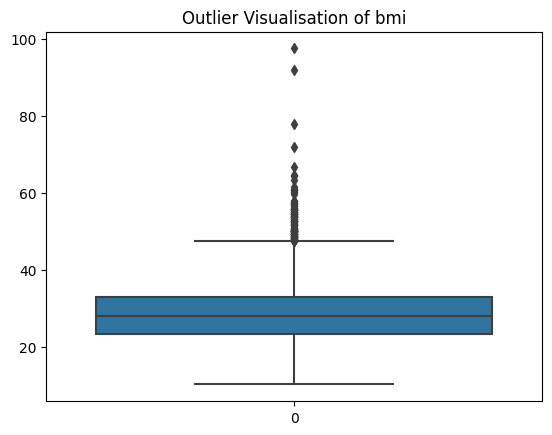

In [195]:
sns.boxplot(df['bmi'])
plt.title("Outlier Visualisation of bmi")

Some outliers present at extremly high rqange

In [196]:
# Bivariant Analysis

In [197]:
# WE will check relationship between target variables and other variables, For the categorical variables, we'll use count plots split by the target variable. For the numerical variables, we'll use box plots or violin plots split by the target variable. 

In [198]:
df1.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


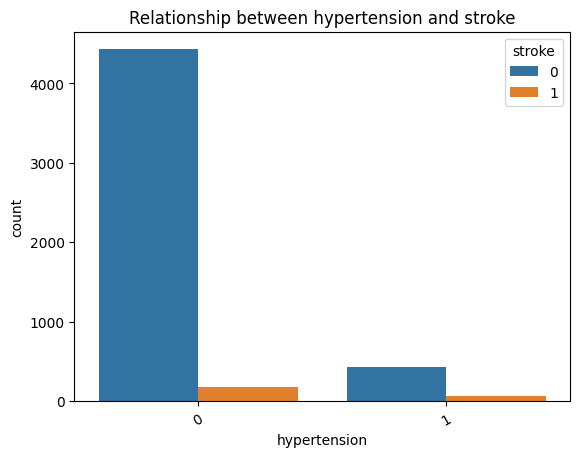

In [199]:
sns.countplot(x=df1["hypertension"], hue=df1['stroke'])
plt.title("Relationship between hypertension and stroke")
plt.xticks(rotation=30)
plt.show()

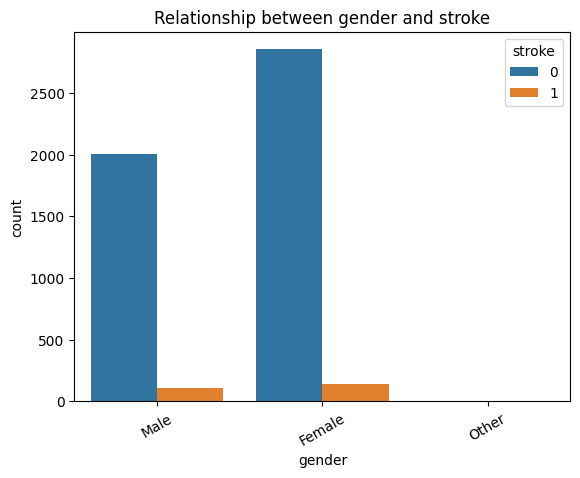

In [200]:
sns.countplot(x=df1["gender"], hue=df1['stroke'])
plt.title("Relationship between gender and stroke")
plt.xticks(rotation=30)
plt.show()

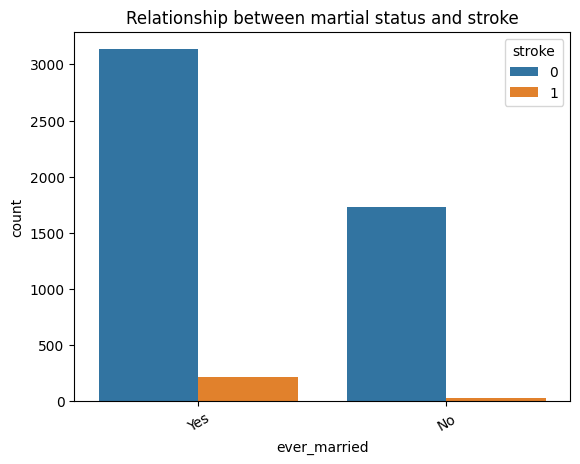

In [201]:
sns.countplot(x=df1["ever_married"], hue=df1['stroke'])
plt.title("Relationship between martial status and stroke")
plt.xticks(rotation=30)
plt.show()

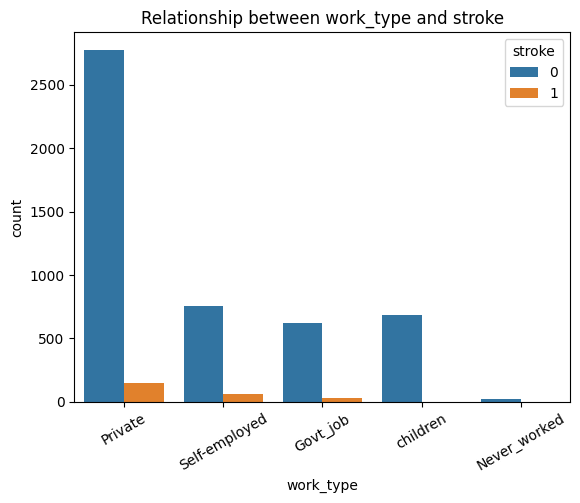

In [202]:
sns.countplot(x=df1["work_type"], hue=df1['stroke'])
plt.title("Relationship between work_type and stroke")
plt.xticks(rotation=30)
plt.show()

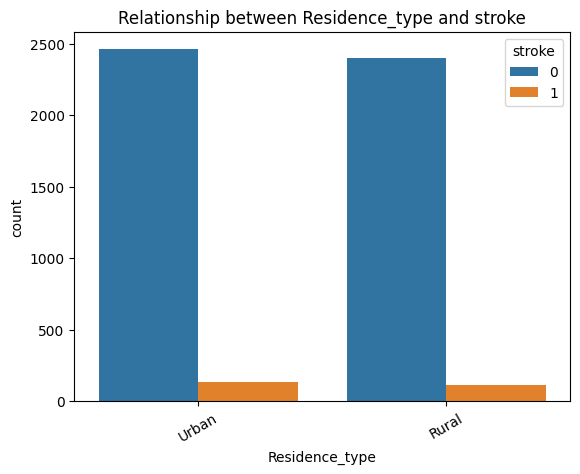

In [203]:
sns.countplot(x=df1["Residence_type"], hue=df1['stroke'])
plt.title("Relationship between Residence_type and stroke")
plt.xticks(rotation=30)
plt.show()

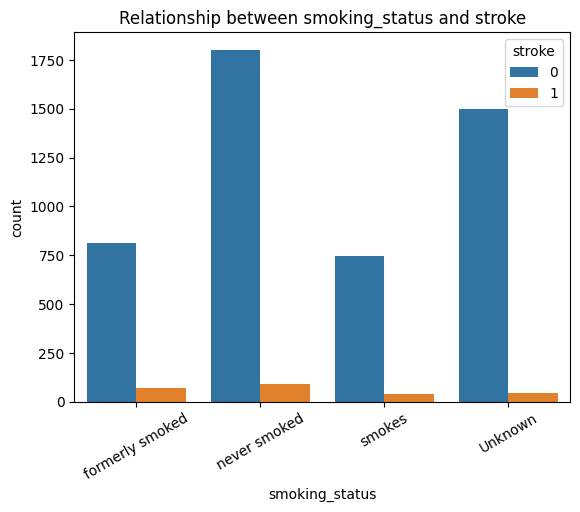

In [204]:
sns.countplot(x=df1["smoking_status"], hue=df1['stroke'])
plt.title("Relationship between smoking_status and stroke")
plt.xticks(rotation=30)
plt.show()

For the numerical variables, we'll use box plots or violin plots split by the target variable. 

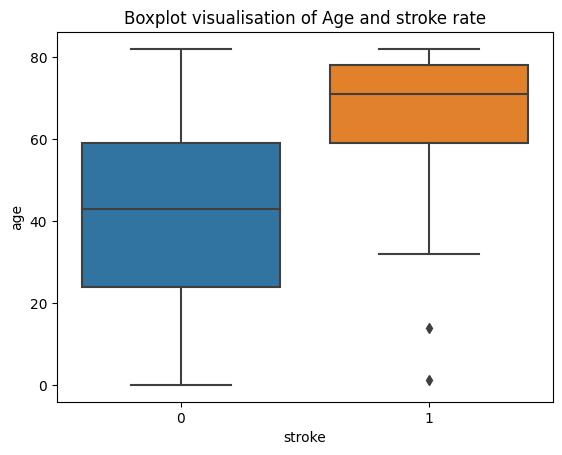

In [205]:
sns.boxplot(x=df1["stroke"], y=df1["age"])
plt.title("Boxplot visualisation of Age and stroke rate")
plt.show()

Most people who attacked by stroke are in age of 58 - 80, some outliers at 0 and 15 age

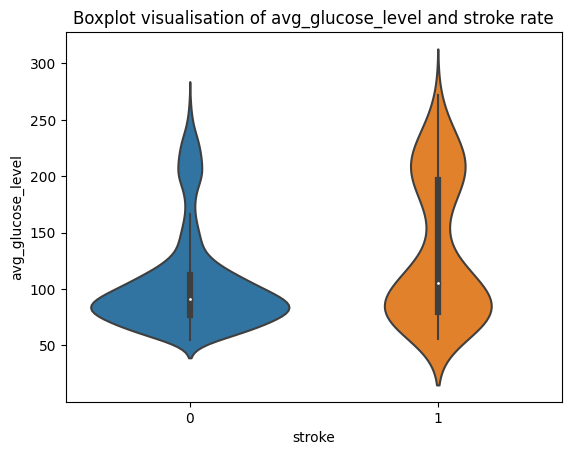

In [206]:
sns.violinplot(x=df1["stroke"], y=df1["avg_glucose_level"])
plt.title("Boxplot visualisation of avg_glucose_level and stroke rate")
plt.show()

People who have  glucose level of 100 - 180 mostly effected by stroke

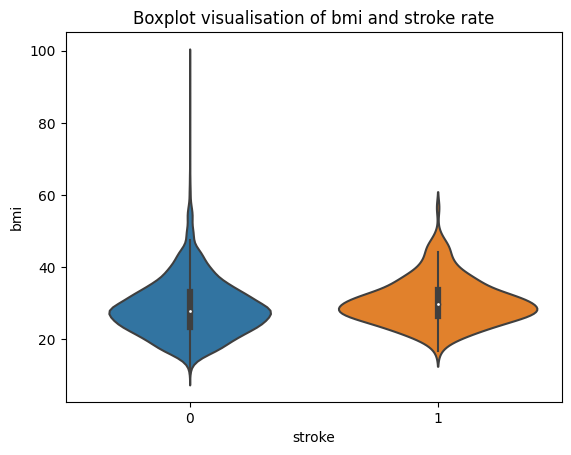

In [207]:
sns.violinplot(x=df1["stroke"], y=df1["bmi"])
plt.title("Boxplot visualisation of bmi and stroke rate")
plt.show()

Not much difference between nonstroke or stroke person with bmi, its almost similar range for both kind of people

Feature Selction

In [208]:
df1.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [209]:
# we will  use a correlation matrix to see how the continuous variables relate to each other and to the target variable stroke.

In [210]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [211]:
df1["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [212]:
le = LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])


In [213]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [214]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [215]:
df1["gender"].unique()

array([1, 0, 2])

In [216]:
df3 = df1.copy()

In [217]:
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [218]:
df3["ever_married"] = df3['ever_married'].replace({'No': 0, 'Yes': 1})


In [219]:
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [220]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [221]:
df3["Residence_type"] = df3['Residence_type'].replace({'Rural': 0, 'Urban': 1})

In [222]:
df3["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [223]:
df3["smoking_status"] = df3["smoking_status"].replace({'Unknown':0,'never smoked':1,'formerly smoked':2,'smokes':3})
df3["smoking_status"]

0       2
1       1
2       1
3       3
4       1
       ..
5105    1
5106    1
5107    1
5108    2
5109    0
Name: smoking_status, Length: 5110, dtype: int64

In [224]:
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,2,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,1,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,1,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,3,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,1,1


In [225]:
df3["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [226]:

df['work_type'] = df['work_type'].astype(str)
dummy = pd.get_dummies(df['work_type'], dtype=int)
dummy

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [227]:
df4 = pd.concat([df3, dummy], axis="columns")

In [228]:
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,1,67.0,0,1,1,Private,1,228.69,36.6,2,1,0,0,1,0,0
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,1,1,0,0,0,1,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,1,1,0,0,1,0,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,3,1,0,0,1,0,0
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,1,1,0,0,0,1,0


In [230]:
df5 = df4.drop(["work_type", "Never_worked"], axis="columns")

In [231]:
df5.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children
0,1,67.0,0,1,1,1,228.69,36.6,2,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,3,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,1,0,0,1,0


# Handling missing values


In [232]:
mean = df5["bmi"].mean()
mean

28.893236911794666

In [233]:
df5["bmi"] = df5["bmi"].fillna(mean)

In [234]:
df5.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Govt_job             0
Private              0
Self-employed        0
children             0
dtype: int64

In [235]:
df6 = df5.copy()

In [236]:
df6.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children
0,1,67.0,0,1,1,1,228.69,36.600000,2,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,3,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,1,0


Boxplot of Age vs worktype

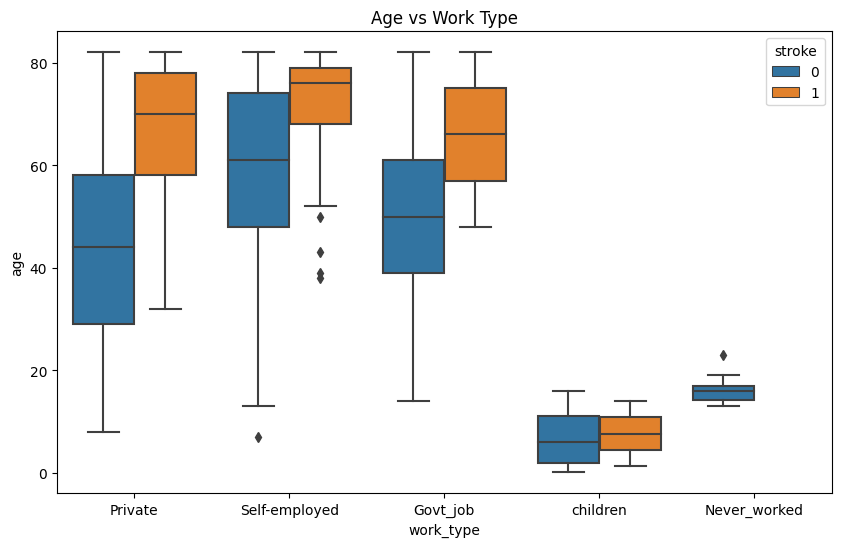

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['work_type'], y=df['age'], hue=df['stroke'])
plt.title('Age vs Work Type')
# plt.xticks(rotation=90)
plt.show()

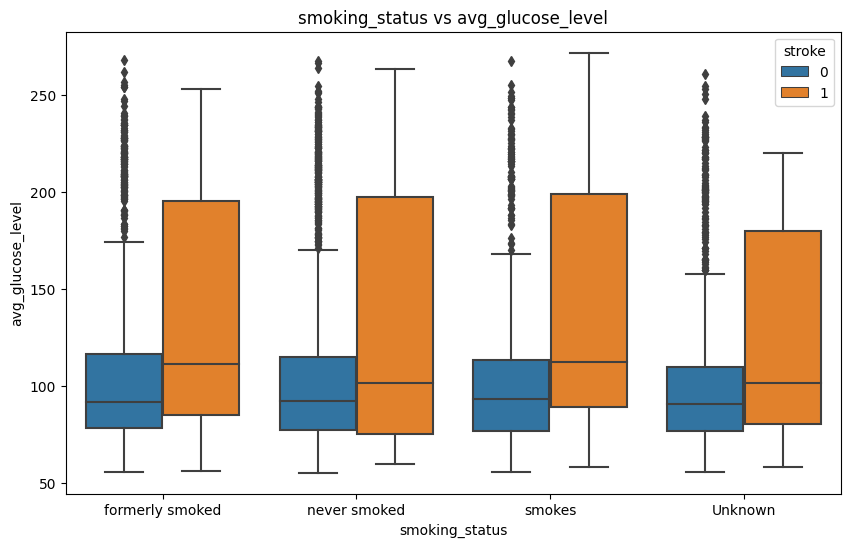

In [238]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['smoking_status'], y=df['avg_glucose_level'], hue=df['stroke'])
plt.title('smoking_status vs avg_glucose_level')
# plt.xticks(rotation=90)
plt.show()

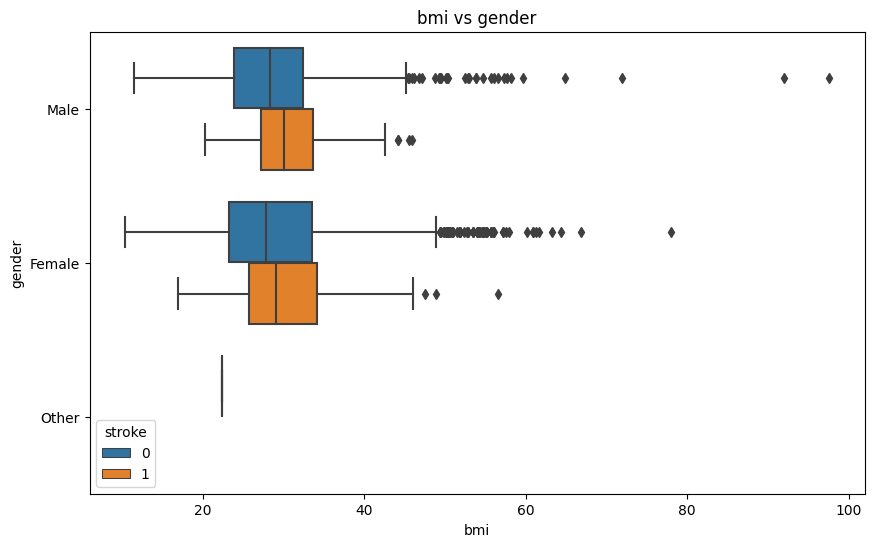

In [239]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['bmi'], y=df['gender'], hue=df['stroke'])
plt.title('bmi vs gender')
# plt.xticks(rotation=90)
plt.show()

In [240]:
# Find Duplicates

In [241]:
duplicate_rows = df6.duplicated()
duplicate_rows.sum()

0

In [242]:
# Outlires removal

# We will use the Interquartile Range (IQR) method to identify outliers. This method defines an outlier as any value that falls below Q1 - 1.5 IQR or above Q3 + 1.5 IQR. Here, Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile). 

In [243]:
def count_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return((x < lower) | (x > upper)).sum()
    

# outliers checking in age, bmi, avg glucose level  
outliers = {x: count_outliers(df6[x]) for x in ['age', 'avg_glucose_level', 'bmi']}  

outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 126}

In [244]:
Zero = (df["avg_glucose_level"] <= 0).sum()
Zero

0

In [245]:
Zero = (df["bmi"] <= 0).sum()
Zero

0

In [246]:
# Apply log transformation to decrease outliers
df6['avg_glucose_level'] = np.log(df6['avg_glucose_level'])
df6['bmi'] = np.log(df6['bmi'])



In [247]:
# again checking outliers

def count_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return((x < lower) | (x > upper)).sum()
    

# outliers checking in age, bmi, avg glucose level  
outliers = {x: count_outliers(df6[x]) for x in [ 'avg_glucose_level', 'bmi']}  

outliers

{'avg_glucose_level': 380, 'bmi': 88}

No. of outliers significantly decreases

In [248]:
df7 = df6.copy()

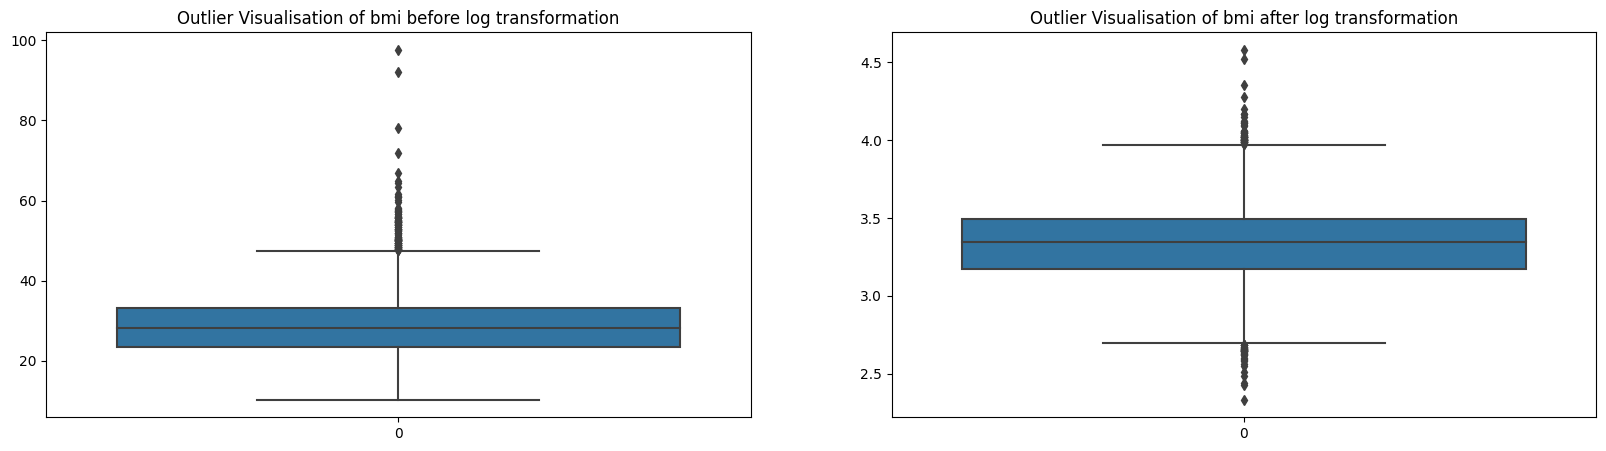

In [249]:
# again visualise outliers
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
# Before
sns.boxplot(df['bmi'],ax=axs[0])
axs[0].set_title("Outlier Visualisation of bmi before log transformation")
# after
sns.boxplot(df6['bmi'],ax=axs[1])
plt.title("Outlier Visualisation of bmi after log transformation")
plt.show()

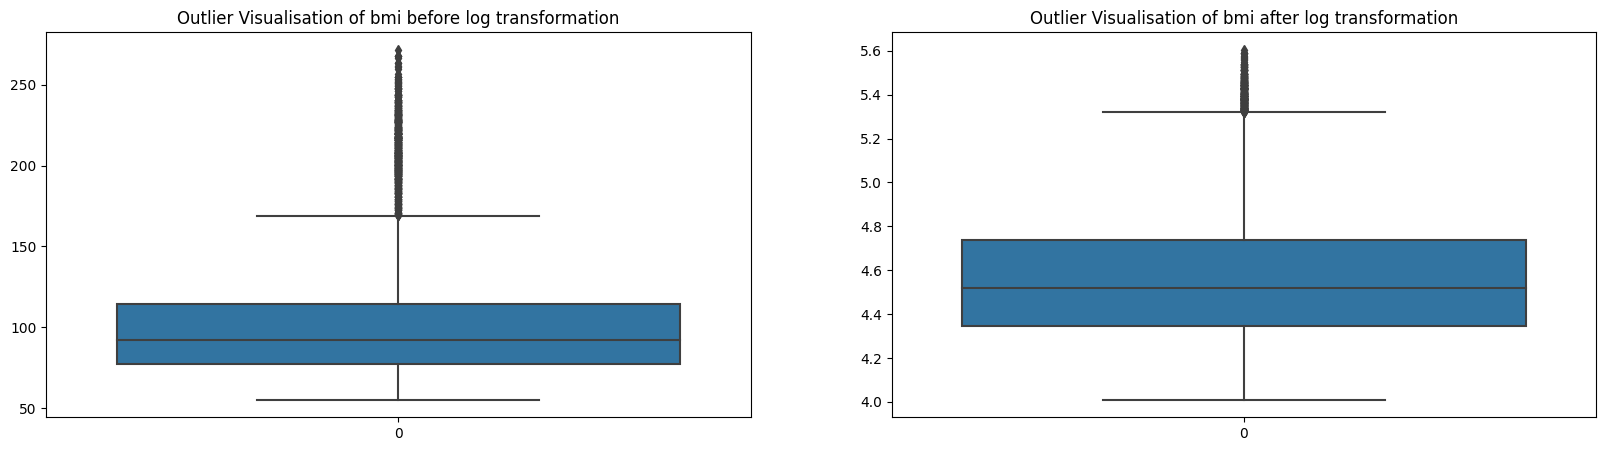

In [250]:
# again visualise outliers
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
# Before
sns.boxplot(df['avg_glucose_level'],ax=axs[0])
axs[0].set_title("Outlier Visualisation of bmi before log transformation")
# after
sns.boxplot(df6['avg_glucose_level'],ax=axs[1])
plt.title("Outlier Visualisation of bmi after log transformation")
plt.show()

Drastical change in number of outliers

Define new features to categorize BMI

df7.head()

In [266]:
df7.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children,bmi_category
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0,Underweight
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0,Underweight
2,1,80.0,0,1,1,0,4.662684,3.481240,1,1,0,1,0,0,Underweight
3,0,49.0,0,0,1,1,5.143008,3.538057,3,1,0,1,0,0,Underweight
4,0,79.0,1,0,1,0,5.159745,3.178054,1,1,0,0,1,0,Underweight


In [267]:
df8 = df7.drop(["bmi_category"], axis="columns")

In [268]:
df8.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0
2,1,80.0,0,1,1,0,4.662684,3.481240,1,1,0,1,0,0
3,0,49.0,0,0,1,1,5.143008,3.538057,3,1,0,1,0,0
4,0,79.0,1,0,1,0,5.159745,3.178054,1,1,0,0,1,0


In [269]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'
    
df8['age_category'] = df8['age'].apply(categorize_age)     

In [270]:
df8.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children,age_category
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0,Senior
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0,Adult


In [271]:
df9 = df8.copy()

In [272]:
df9.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children,age_category
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0,Senior
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0,Adult


In [276]:
dummy = pd.get_dummies(df9["age_category"], dtype=int)
dummy

,Adult,Child,Senior
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
5105,0,0,1
5106,0,0,1
5107,1,0,0
5108,1,0,0


In [277]:
df10 = pd.concat([df9,dummy], axis="columns")

In [278]:
df10.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children,age_category,Adult,Child,Senior
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0,Senior,0,0,1
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0,Adult,1,0,0
2,1,80.0,0,1,1,0,4.662684,3.481240,1,1,0,1,0,0,Senior,0,0,1
3,0,49.0,0,0,1,1,5.143008,3.538057,3,1,0,1,0,0,Adult,1,0,0
4,0,79.0,1,0,1,0,5.159745,3.178054,1,1,0,0,1,0,Senior,0,0,1


In [280]:
df11 = df10.copy()

In [285]:
df12 = df11.drop(["age_category"], axis="columns")

In [286]:
df12.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Private,Self-employed,children,Adult,Child,Senior
0,1,67.0,0,1,1,1,5.432367,3.600048,2,1,0,1,0,0,0,0,1
1,0,61.0,0,0,1,0,5.309307,3.363608,1,1,0,0,1,0,1,0,0
2,1,80.0,0,1,1,0,4.662684,3.481240,1,1,0,1,0,0,0,0,1
3,0,49.0,0,0,1,1,5.143008,3.538057,3,1,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,5.159745,3.178054,1,1,0,0,1,0,0,0,1


In [287]:
df13 = df12.copy()

In [291]:
X = df13.drop(["stroke"], axis="columns")
y = df13["stroke"]
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Private,Self-employed,children,Adult,Child,Senior
0,1,67.0,0,1,1,1,5.432367,3.600048,2,0,1,0,0,0,0,1
1,0,61.0,0,0,1,0,5.309307,3.363608,1,0,0,1,0,1,0,0
2,1,80.0,0,1,1,0,4.662684,3.481240,1,0,1,0,0,0,0,1
3,0,49.0,0,0,1,1,5.143008,3.538057,3,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,5.159745,3.178054,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,4.427836,3.363608,1,0,1,0,0,0,0,1
5106,0,81.0,0,0,1,1,4.829912,3.688879,1,0,0,1,0,0,0,1
5107,0,35.0,0,0,1,0,4.418720,3.421000,1,0,0,1,0,1,0,0
5108,1,51.0,0,0,1,0,5.113733,3.242592,2,0,1,0,0,1,0,0


In [327]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
# Split The data

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [293]:
len(X_train)

4088

In [294]:
len(y_train)

4088

In [ ]:
# Standarize by StandardScaler

In [295]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.fit_transform(X_test)

In [296]:
from sklearn.pipeline import Pipeline

In [319]:
steps = [("scaling", StandardScaler()),
         ("lg", LogisticRegression())
        ]

In [320]:
from sklearn import set_config

In [321]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('lg', LogisticRegression())])

In [322]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('lg', LogisticRegression())])

In [323]:
pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [325]:
pipe.score(X_test, y_test)

0.9530332681017613

In [358]:
lg_pred = pipe.predict(X_test)
lg_pred_accuracy = accuracy_score(y_test, lg_pred)   # For logistic regression
lg_pred_accuracy

0.9530332681017613

In [362]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [363]:
rf.score(X_test, y_test)

0.9500978473581213

In [365]:
rf_pred = rf.predict(X_test)
rf_pred_accuracy = accuracy_score(y_test, rf_pred)   # For logistic regression
rf_pred_accuracy

0.9500978473581213

In [330]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [332]:
knn.score(X_test, y_test)

0.9510763209393346

In [366]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy

0.9510763209393346

In [337]:
# Naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [338]:
nb.score(X_test, y_test)

0.7573385518590998

In [349]:

nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_accuracy

0.7573385518590998

In [339]:
from sklearn.metrics import accuracy_score

In [340]:
# decision tree
ds = DecisionTreeClassifier()
ds.fit(X_train, y_train)

DecisionTreeClassifier()

In [342]:
ds.score(X_test, y_test)

0.9070450097847358

In [367]:
ds_pred = ds.predict(X_test)
ds_accuracy = accuracy_score(y_test, ds_pred)
ds_accuracy

0.9070450097847358

In [371]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [379]:
x = lr.score(X_test, y_test)
x

-4.3847943222777315e+20

In [387]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', "Naive Bayes"]
models = pd.DataFrame(models, columns=['model'])

In [388]:
models

,model
0,Logistic Regression
1,KNN
2,Random Forest
3,Decision Tree
4,Naive Bayes


In [391]:
models['accuracy_scores'] = [lg_pred_accuracy, knn_accuracy, rf_pred_accuracy, ds_accuracy, nb_accuracy]

In [392]:
models

,model,accuracy_score_of_models,accuracy_scores
0,Logistic Regression,0.953033,0.953033
1,KNN,0.951076,0.951076
2,Random Forest,0.950098,0.950098
3,Decision Tree,0.907045,0.907045
4,Naive Bayes,0.757339,0.757339


In [393]:
models = models.drop(["accuracy_score_of_models"], axis="columns")

In [394]:
models

,model,accuracy_scores
0,Logistic Regression,0.953033
1,KNN,0.951076
2,Random Forest,0.950098
3,Decision Tree,0.907045
4,Naive Bayes,0.757339
